## References

#### Video Link : https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=2

#### Github : https://github.com/karpathy/makemore/tree/master

## Imports

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('/kaggle/input/eureka-labs/names.txt', 'r').read().splitlines()

In [3]:
list(words[0])

['e', 'm', 'm', 'a']

In [4]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [5]:
sorted(b.items(), key = lambda kv: kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [6]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [8]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

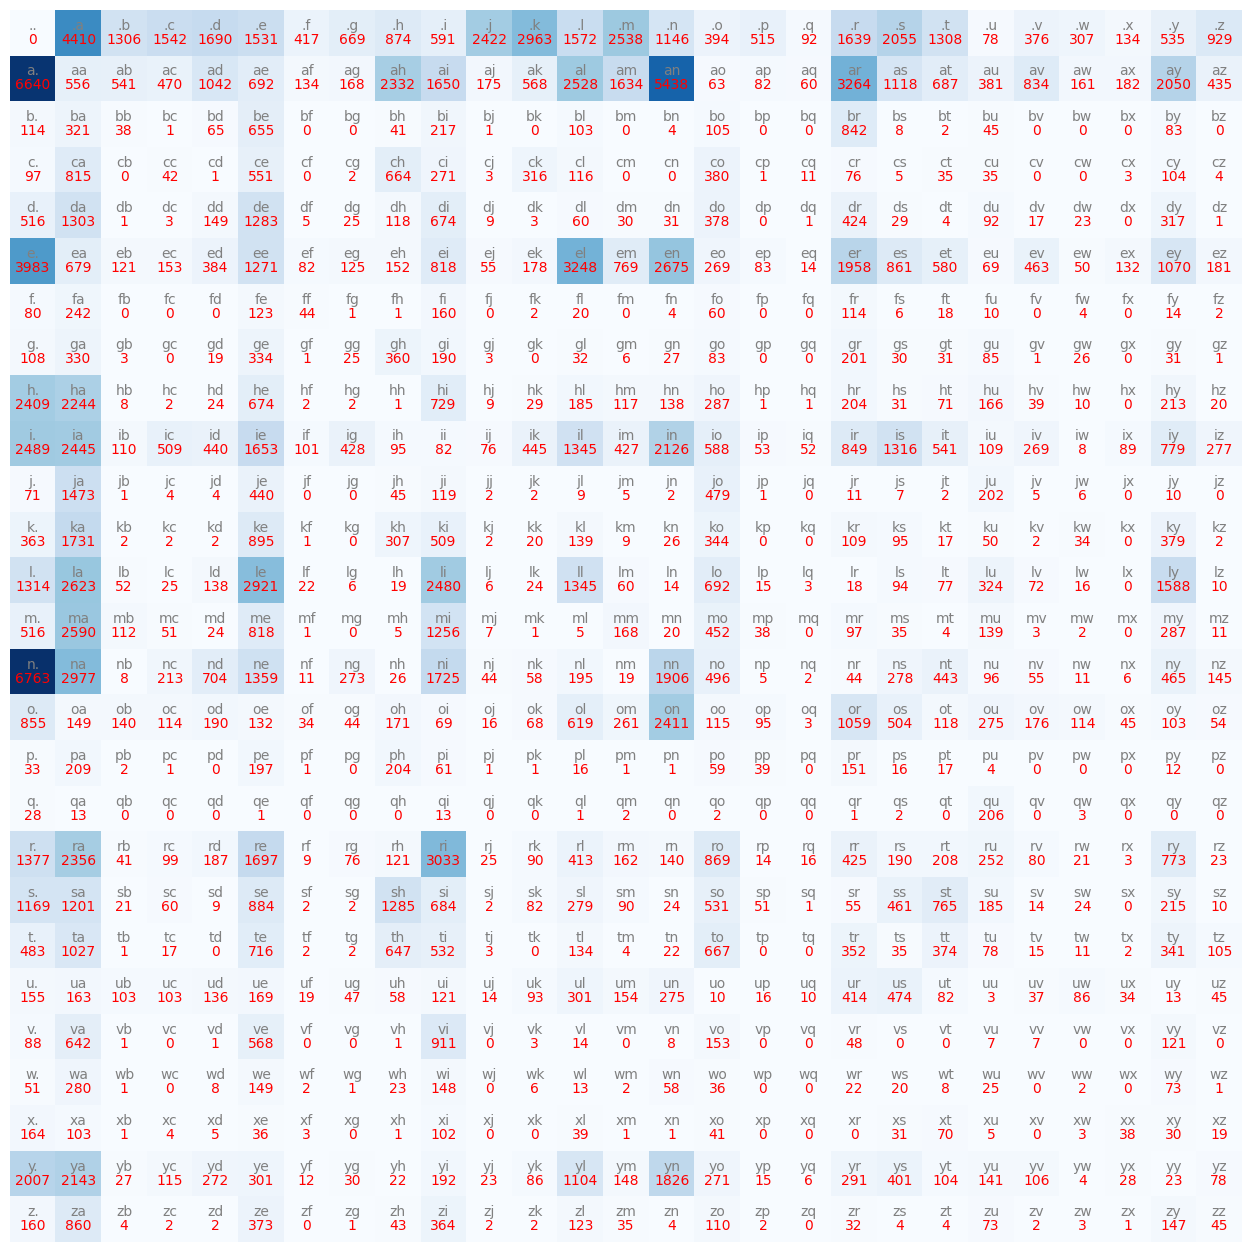

In [9]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='red')
plt.axis('off');

In [10]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [11]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

#### 1) g  = torch.Generator().manual_seed(123456834) --- to produce multinomial results again
#### 2) torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item() --- to select one probability index from p randomely

In [12]:
g  = torch.Generator().manual_seed(123456834)
ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
itos[ix]

'd'

In [13]:
P = N.float()
print(P.shape)
print(P.sum(1, keepdim=True).shape) #Broadcasting operatio [[todo]]

torch.Size([27, 27])
torch.Size([27, 1])


In [14]:
P.sum(1)

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

#### P.sum(1, keepdim=True) - sum of the matrix rows

In [15]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [16]:
g = torch.Generator().manual_seed(214748364)

for i in range(5):
    out = []
    ix  = 0
    while(True):
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))   

bdaita.
shely.
ka.
orcehensiollya.
jemana.


## Calculating the loss of bigram model

#### 1) GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
#### 2) equivalent to maximizing the log likelihood (because log is monotonic)
#### 3) equivalent to minimizing the negative log likelihood
#### 4) equivalent to minimizing the average negative log likelihood

#### 5) log(a*b*c) = log(a) + log(b) + log(c)

In [17]:
log_likelihood = 0.0
n              = 0
for w in words[:5]:
    chs        = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1             = stoi[ch1]
        ix2             = stoi[ch2]
        prob            = P[ix1, ix2]
        log_prob        = torch.log(prob)
        log_likelihood += log_prob
        n              +=1
        
print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")

log_likelihood=tensor(-77.7680)
nll=tensor(77.7680)
2.4302496910095215


## Creating the neural network now

In [18]:
xs, ys = [],[]
for w in words[:1]:
    chs  = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1  = stoi[ch1]
        ix2  = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [19]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
xenc.shape

torch.Size([5, 27])

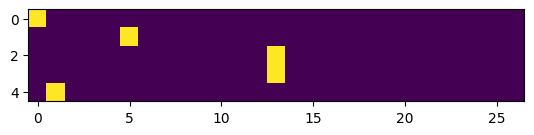

In [21]:
plt.imshow(xenc)

In [22]:
#(5,27) * (27,1) = (5,1)
W = torch.randn((27,1))
print(W.shape)
xenc @ W

torch.Size([27, 1])


tensor([[ 1.8400],
        [-0.8351],
        [ 1.6316],
        [ 1.6316],
        [ 2.1550]])

In [23]:
#(5,27) * (27,27) = (5,27)
W = torch.randn((27,27))
print(W.shape)
xenc @ W

torch.Size([27, 27])


tensor([[ 2.0387,  1.0972,  0.4810,  1.0430,  0.8581, -0.4229, -1.6636,  0.8282,
         -0.4702, -0.3280, -0.0327, -0.4424,  0.6581, -0.0103,  1.4658,  1.1215,
         -0.4707, -0.1299, -0.2927, -0.4249,  2.1833,  0.5695,  0.6609,  2.4635,
         -0.7230,  0.4080, -2.4296],
        [-0.3410,  0.5621,  1.3746, -0.8741, -0.3351, -0.1128,  0.6200, -1.3003,
          0.0544, -0.1653,  0.4800,  0.9929, -0.0986,  0.5501, -0.4390, -0.6091,
         -0.3179,  2.2062, -0.4151,  0.0184,  1.7960,  0.3965, -0.1870,  0.6770,
         -0.3841,  0.9996, -0.6220],
        [ 1.2173, -1.6432, -1.3844, -1.0035, -0.2505,  0.6952, -0.6178, -0.5970,
         -1.2653, -0.1467,  0.1226,  1.9453,  1.0362,  0.8312,  0.4770,  1.1860,
          0.2048, -0.5063, -1.1791,  1.0663, -0.4195, -0.7151,  0.7065, -0.3843,
         -0.9599, -0.5682, -2.8187],
        [ 1.2173, -1.6432, -1.3844, -1.0035, -0.2505,  0.6952, -0.6178, -0.5970,
         -1.2653, -0.1467,  0.1226,  1.9453,  1.0362,  0.8312,  0.4770,  1.1860

In [24]:
(xenc @ W).exp()

tensor([[ 7.6803,  2.9957,  1.6177,  2.8378,  2.3586,  0.6551,  0.1894,  2.2893,
          0.6249,  0.7204,  0.9678,  0.6425,  1.9310,  0.9897,  4.3310,  3.0694,
          0.6245,  0.8782,  0.7463,  0.6538,  8.8758,  1.7673,  1.9365, 11.7461,
          0.4853,  1.5039,  0.0881],
        [ 0.7110,  1.7543,  3.9536,  0.4172,  0.7153,  0.8933,  1.8588,  0.2724,
          1.0559,  0.8476,  1.6160,  2.6991,  0.9061,  1.7335,  0.6447,  0.5439,
          0.7277,  9.0808,  0.6602,  1.0185,  6.0256,  1.4866,  0.8294,  1.9680,
          0.6811,  2.7173,  0.5368],
        [ 3.3781,  0.1934,  0.2505,  0.3666,  0.7784,  2.0042,  0.5391,  0.5505,
          0.2822,  0.8636,  1.1304,  6.9961,  2.8186,  2.2960,  1.6113,  3.2741,
          1.2273,  0.6027,  0.3076,  2.9045,  0.6573,  0.4891,  2.0268,  0.6809,
          0.3829,  0.5665,  0.0597],
        [ 3.3781,  0.1934,  0.2505,  0.3666,  0.7784,  2.0042,  0.5391,  0.5505,
          0.2822,  0.8636,  1.1304,  6.9961,  2.8186,  2.2960,  1.6113,  3.2741

In [25]:
logits = xenc @ W
counts = logits.exp()
prob   = counts/counts.sum(1,keepdims=True)
prob

tensor([[0.1215, 0.0474, 0.0256, 0.0449, 0.0373, 0.0104, 0.0030, 0.0362, 0.0099,
         0.0114, 0.0153, 0.0102, 0.0306, 0.0157, 0.0685, 0.0486, 0.0099, 0.0139,
         0.0118, 0.0103, 0.1404, 0.0280, 0.0306, 0.1858, 0.0077, 0.0238, 0.0014],
        [0.0153, 0.0378, 0.0853, 0.0090, 0.0154, 0.0193, 0.0401, 0.0059, 0.0228,
         0.0183, 0.0349, 0.0582, 0.0195, 0.0374, 0.0139, 0.0117, 0.0157, 0.1959,
         0.0142, 0.0220, 0.1300, 0.0321, 0.0179, 0.0425, 0.0147, 0.0586, 0.0116],
        [0.0907, 0.0052, 0.0067, 0.0098, 0.0209, 0.0538, 0.0145, 0.0148, 0.0076,
         0.0232, 0.0304, 0.1879, 0.0757, 0.0617, 0.0433, 0.0879, 0.0330, 0.0162,
         0.0083, 0.0780, 0.0177, 0.0131, 0.0544, 0.0183, 0.0103, 0.0152, 0.0016],
        [0.0907, 0.0052, 0.0067, 0.0098, 0.0209, 0.0538, 0.0145, 0.0148, 0.0076,
         0.0232, 0.0304, 0.1879, 0.0757, 0.0617, 0.0433, 0.0879, 0.0330, 0.0162,
         0.0083, 0.0780, 0.0177, 0.0131, 0.0544, 0.0183, 0.0103, 0.0152, 0.0016],
        [0.0227, 0.0122,

In [26]:
#Randomely initialising 27 neurons weights. each neuron will have 27 inputs.
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27,27), generator=g)
#W

In [27]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network : one hot encoding
logits = xenc @ W                            # predict log-counts
counts = logits.exp()                        # counts equivalent to N
probs  = counts/counts.sum(1,keepdims=True)  # probabilities for next character
probs                       

tensor([[0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
         0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
         0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310],
        [0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
         0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
         0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205],
        [0.0973, 0.0235, 0.2014, 0.0240, 0.0510, 0.0341, 0.0644, 0.0075, 0.0197,
         0.0502, 0.0316, 0.0015, 0.0192, 0.0321, 0.0127, 0.0035, 0.0148, 0.0052,
         0.0262, 0.0415, 0.0086, 0.0445, 0.0277, 0.0252, 0.1034, 0.0042, 0.0250],
        [0.0973, 0.0235, 0.2014, 0.0240, 0.0510, 0.0341, 0.0644, 0.0075, 0.0197,
         0.0502, 0.0316, 0.0015, 0.0192, 0.0321, 0.0127, 0.0035, 0.0148, 0.0052,
         0.0262, 0.0415, 0.0086, 0.0445, 0.0277, 0.0252, 0.1034, 0.0042, 0.0250],
        [0.0737, 0.0209,

In [28]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.05734505504369736
log likelihood: -2.858668565750122
negative log likelihood: 2.858668565750122
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

## OPTIMIZATION

In [29]:
xs

tensor([ 0,  5, 13, 13,  1])

In [30]:
ys

tensor([ 5, 13, 13,  1,  0])

In [31]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [32]:
#Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network : one hot encoding
logits = xenc @ W                            # predict log-counts
counts = logits.exp()                        # counts equivalent to N
probs  = counts/counts.sum(1,keepdims=True)
loss   = - probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [33]:
#Backward pass
W.grad = None
loss.backward()

In [34]:
W.data += -0.1 * W.grad

## Complete training loop

### Initialization

In [35]:
from tqdm import tqdm
xs, ys = [],[]
for w in tqdm(words):
    chs  = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1  = stoi[ch1]
        ix2  = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(f"Number of examples : {len(xs)}")

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

100%|██████████| 32033/32033 [00:00<00:00, 194626.53it/s]


Number of examples : 228146


### Training loop

In [36]:
learning_rate = 50
batches       = 100

for i in tqdm(range(batches)):
    #forward pass
    xenc   = F.one_hot(xs, num_classes=27).float() # input to the network : one hot encoding
    logits = xenc @ W                            # predict log-counts
    counts = logits.exp()                        # counts equivalent to N
    probs  = counts/counts.sum(1,keepdims=True)
    loss   = - probs[torch.arange(len(xs)), ys].log().mean()
    print(loss.item())
    
    #backward pass
    W.grad = None
    loss.backward()

    #update
    W.data += -learning_rate * W.grad

  0%|          | 0/100 [00:00<?, ?it/s]

3.758953332901001


  1%|          | 1/100 [00:00<00:17,  5.70it/s]

3.371100664138794


  3%|▎         | 3/100 [00:00<00:12,  7.63it/s]

3.1540427207946777
3.020374059677124
2.927711248397827


  5%|▌         | 5/100 [00:00<00:09,  9.65it/s]

2.8604023456573486


  6%|▌         | 6/100 [00:00<00:09,  9.63it/s]

2.8097290992736816
2.7701022624969482


  8%|▊         | 8/100 [00:00<00:08, 11.06it/s]

2.7380728721618652


 10%|█         | 10/100 [00:00<00:07, 12.38it/s]

2.711496353149414
2.6890032291412354


 12%|█▏        | 12/100 [00:01<00:06, 12.63it/s]

2.6696884632110596


 14%|█▍        | 14/100 [00:01<00:06, 12.89it/s]

2.6529300212860107
2.638277292251587
2.6253879070281982


 16%|█▌        | 16/100 [00:01<00:06, 13.29it/s]

2.613990545272827
2.60386323928833


 18%|█▊        | 18/100 [00:01<00:06, 13.33it/s]

2.5948219299316406


 20%|██        | 20/100 [00:01<00:05, 13.84it/s]

2.5867116451263428
2.5794036388397217
2.572789192199707


 22%|██▏       | 22/100 [00:01<00:06, 12.94it/s]

2.5667760372161865
2.5612878799438477
2.5562589168548584


 24%|██▍       | 24/100 [00:02<00:05, 12.99it/s]

2.551633596420288
2.547365665435791


 26%|██▌       | 26/100 [00:02<00:05, 12.54it/s]

2.5434155464172363


 28%|██▊       | 28/100 [00:02<00:05, 13.37it/s]

2.5397486686706543
2.5363364219665527
2.533154249191284


 32%|███▏      | 32/100 [00:02<00:04, 14.27it/s]

2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076


 36%|███▌      | 36/100 [00:02<00:04, 14.39it/s]

2.520028829574585
2.5178580284118652
2.515810489654541


 40%|████      | 40/100 [00:03<00:04, 13.94it/s]

2.513878107070923
2.512052059173584
2.510324001312256


 42%|████▏     | 42/100 [00:03<00:04, 14.41it/s]

2.5086872577667236
2.5071349143981934
2.5056610107421875


 46%|████▌     | 46/100 [00:03<00:03, 13.81it/s]

2.504261016845703
2.502929210662842
2.5016608238220215


 48%|████▊     | 48/100 [00:03<00:03, 14.03it/s]

2.5004520416259766
2.4992988109588623
2.498197317123413
2.497144937515259


 52%|█████▏    | 52/100 [00:03<00:03, 14.93it/s]

2.496137857437134
2.495173692703247
2.4942493438720703
2.49336314201355


 56%|█████▌    | 56/100 [00:04<00:02, 15.37it/s]

2.4925124645233154
2.4916954040527344
2.4909095764160156


 60%|██████    | 60/100 [00:04<00:02, 14.64it/s]

2.4901537895202637
2.4894261360168457
2.488725423812866


 62%|██████▏   | 62/100 [00:04<00:02, 14.12it/s]

2.488049268722534
2.4873974323272705
2.4867680072784424


 64%|██████▍   | 64/100 [00:04<00:02, 13.98it/s]

2.4861602783203125
2.4855728149414062
2.4850046634674072


 68%|██████▊   | 68/100 [00:05<00:02, 14.30it/s]

2.484455108642578
2.4839231967926025
2.483408212661743
2.4829084873199463


 72%|███████▏  | 72/100 [00:05<00:01, 14.47it/s]

2.482424259185791
2.48195481300354
2.481499195098877
2.4810571670532227


 76%|███████▌  | 76/100 [00:05<00:01, 14.81it/s]

2.4806275367736816
2.480210065841675
2.479804515838623
2.479410409927368


 80%|████████  | 80/100 [00:05<00:01, 14.17it/s]

2.4790267944335938
2.4786536693573
2.478290557861328


 84%|████████▍ | 84/100 [00:06<00:01, 14.55it/s]

2.4779367446899414
2.4775924682617188
2.477257251739502
2.4769303798675537


 88%|████████▊ | 88/100 [00:06<00:00, 14.91it/s]

2.476611852645874
2.4763007164001465
2.4759979248046875
2.4757025241851807


 90%|█████████ | 90/100 [00:06<00:00, 15.25it/s]

2.475414276123047
2.475132703781128
2.474858045578003


 94%|█████████▍| 94/100 [00:06<00:00, 14.10it/s]

2.4745898246765137
2.474327564239502
2.474071979522705


 98%|█████████▊| 98/100 [00:07<00:00, 14.43it/s]

2.4738216400146484
2.4735772609710693
2.4733383655548096


100%|██████████| 100/100 [00:07<00:00, 13.68it/s]

2.47310471534729
2.4728758335113525
